## <font color = 'blue'> Importing libraries for EDA and dataset. </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Reading dataset
df = pd.read_csv('scrubbed.csv')
df.head()

C:\Users\darri\AppData\Local\Temp\ipykernel_22380\1297414277.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## <font color = 'blue'> Checking dataset for general info of columns and data cleaning. </font>

In [3]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [4]:
# Missing data check, columns sorted by sum of null values
df.isnull().sum().sort_values(ascending=False)

country                 9670
state                   5797
shape                   1932
comments                  15
datetime                   0
city                       0
duration (seconds)         0
duration (hours/min)       0
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [5]:
# 'country', 'state' and 'shape' columns: filling null values with 'others'
df.fillna({'country':'others'}, inplace=True) # filling countries based on state is not feasible as sometimes state is incorrectly entered
df.fillna({'state':'others'}, inplace=True)
df.fillna({'shape':'others'}, inplace=True)

# 'comments' column: filling null values with 'none'
df.fillna({'comments':'none'}, inplace=True)

# cleaning up text in comments
df['comments'] = df['comments'].str.replace('#44', ' ', regex=False)
df['comments'] = df['comments'].str.replace('#33', ' ', regex=False)
df['comments'] = df['comments'].str.replace('&quot;', ' ', regex=False)
df['comments'] = df['comments'].str.replace('&', ' ', regex=False)

In [6]:
# Converting 'datetime' from float to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Removing rows where 'datetime' is null values
df.dropna(subset=['datetime'], inplace=True)

df['datetime'].head()

0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: datetime, dtype: datetime64[ns]

In [7]:
# Removing non numeric values from 'latitude' column and converting to float
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df.dropna(subset=['latitude'], inplace=True)

df['latitude'].head()

0    29.883056
1    29.384210
2    53.200000
3    28.978333
4    21.418056
Name: latitude, dtype: float64

In [8]:
# Removing duplicates
df.drop_duplicates()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,others,light,7200,1-2 hrs,1949 Lackland AFB TX. Lights racing across ...,12/16/2005,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),others,gb,circle,20,20 seconds,Green/Orange circular disc over Chester England,1/21/2008,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise ID spherical 20 min 10 red light...,9/30/2013,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO,9/30/2013,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


## <font color = 'blue'> Plotting time series </font>

In [9]:
# Creating new columns for Date, Month, Year and Time(24hrs) for subsequent export use
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['month'] = df['datetime'].dt.strftime('%m')
df['year'] = df['datetime'].dt.strftime('%Y')
df['time'] = df['datetime'].dt.strftime('%H')

In [10]:
# Setting date to index
df.set_index('datetime').head()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,month,year,time
datetime,,,,,,,,,,,,,,
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10,10,1949,20
1949-10-10 21:00:00,lackland afb,tx,others,light,7200,1-2 hrs,1949 Lackland AFB TX. Lights racing across ...,12/16/2005,29.384210,-98.581082,1949-10-10,10,1949,21
1955-10-10 17:00:00,chester (uk/england),others,gb,circle,20,20 seconds,Green/Orange circular disc over Chester England,1/21/2008,53.200000,-2.916667,1955-10-10,10,1955,17
1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956-10-10,10,1956,21
1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960-10-10,10,1960,20


In [11]:
# Sorting datetime
df.sort_values("datetime", inplace=True)
df.set_index("datetime", inplace=True)

<Axes: title={'center': 'Yearly Sightings'}, xlabel='datetime'>

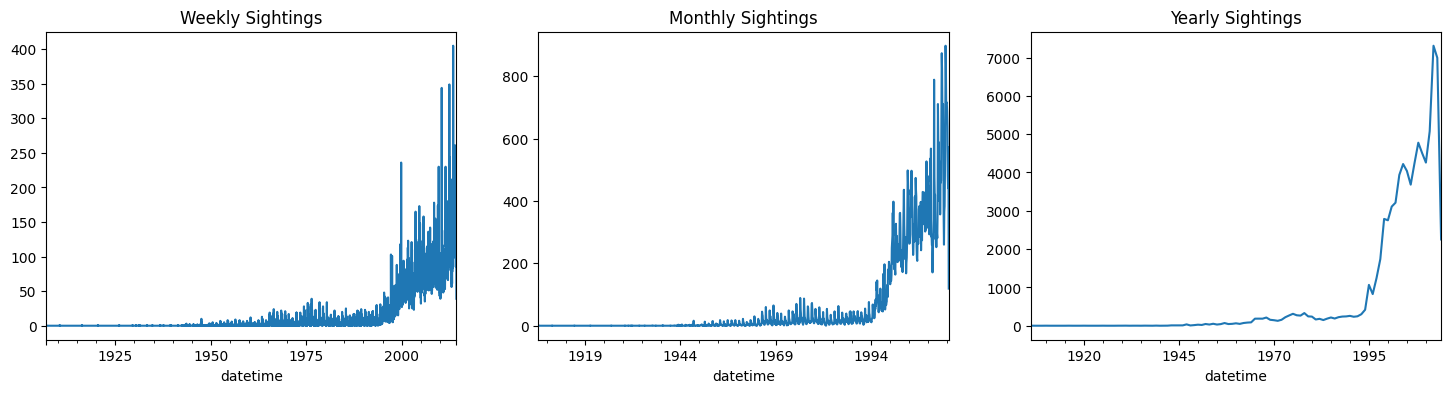

In [12]:
# create 3 plots side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# plotting sightings in weekly, monthly and yearly time series charts
df['sightings'] = 1
df.resample('W')['sightings'].sum().plot(ax=ax[0], title="Weekly Sightings")
df.resample('ME')['sightings'].sum().plot(ax=ax[1], title="Monthly Sightings")
df.resample('YE')['sightings'].sum().plot(ax=ax[2], title="Yearly Sightings")

<font color = 'green'> Records of sightings increased after 1950s. </font>

<Axes: xlabel='month'>

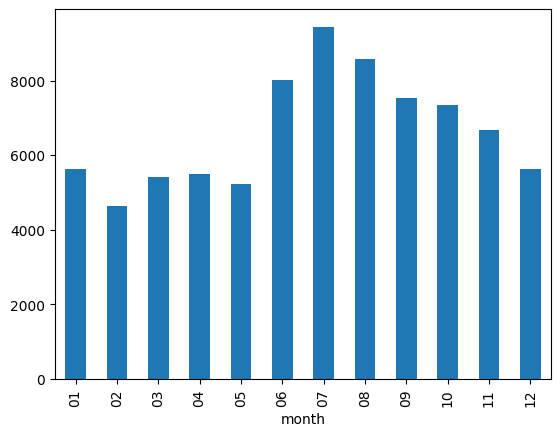

In [13]:
# Total sightings by Month
df.groupby('month')['sightings'].sum().plot.bar()

<font color = 'green'> July has the highest recorded number of sightings, with Summer (Jun to Aug) seeing higher sightings than other seasons. </font>

<Axes: xlabel='time'>

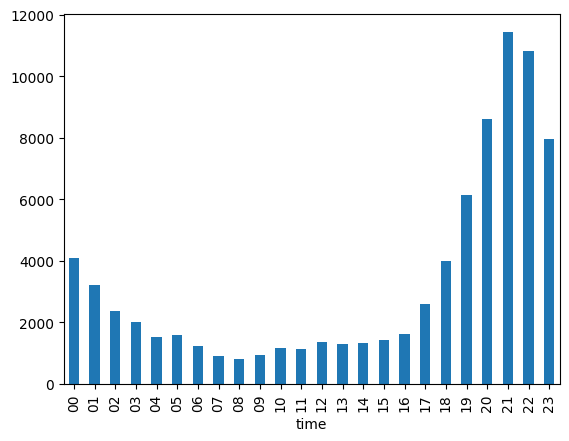

In [14]:
# Total sightings by Time
df.groupby('time')['sightings'].sum().plot.bar()

<font color = 'green'> Most sightings occurs between 7pm to 12mn. </font>

<Axes: xlabel='shape'>

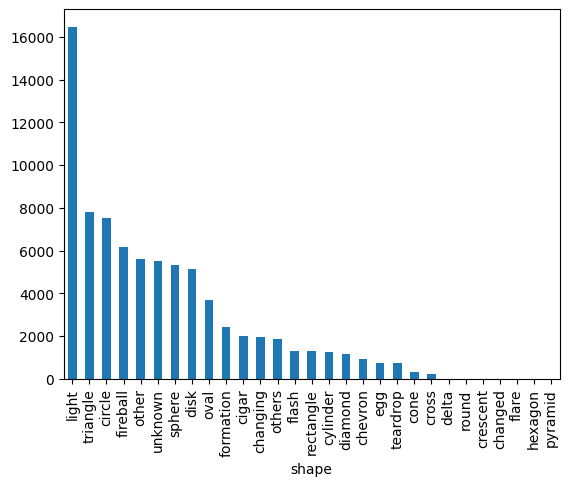

In [15]:
# Total sightings by Time
df.groupby('shape')['sightings'].sum().sort_values(ascending=False).plot.bar()

<font color = 'green'> The most common UFO seen is in the form of light emmitting shapes. </font>

## <font color = 'blue'> Refining the Scope of Analysis </font>

<Axes: xlabel='country'>

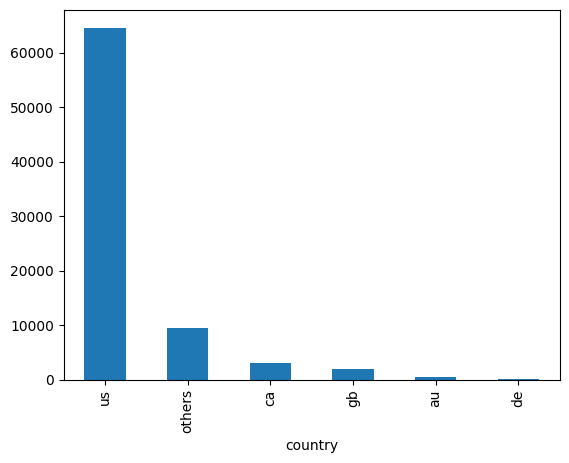

In [16]:
# Total sightings by Country
df.groupby('country')['sightings'].sum().sort_values(ascending=False).plot.bar()

<font color = 'green'> US has the most sightings at more than 60,000 total cases. </font>

In [17]:
# Creating a filtered dataframe for US and removing the earlier years where less sightings are recorded.
new_df = df[(df['country'] == 'us') & (df['year'] >= '1990') & (df['year'] <= '2013')]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57795 entries, 1990-01-03 20:00:00 to 2013-12-31 23:55:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  57795 non-null  object 
 1   state                 57795 non-null  object 
 2   country               57795 non-null  object 
 3   shape                 57795 non-null  object 
 4   duration (seconds)    57795 non-null  object 
 5   duration (hours/min)  57795 non-null  object 
 6   comments              57795 non-null  object 
 7   date posted           57795 non-null  object 
 8   latitude              57795 non-null  float64
 9   longitude             57795 non-null  float64
 10  date                  57795 non-null  object 
 11  month                 57795 non-null  object 
 12  year                  57795 non-null  object 
 13  time                  57795 non-null  object 
 14  sightings             57795 non-nul

In [18]:
# Checking the year range
print(f'Year Range Starting from: {new_df.year.min()}.')
print(f'Year Range Ending in: {new_df.year.max()}.')

Year Range Starting from: 1990.
Year Range Ending in: 2013.


In [ ]:
# Display sum of sightings by month end
mthly_sightings = new_df.resample('ME')['sightings'].sum()
mthly_sightings.head()

datetime
1990-01-31     9
1990-02-28    13
1990-03-31     6
1990-04-30     5
1990-05-31    10
Freq: ME, Name: sightings, dtype: int64

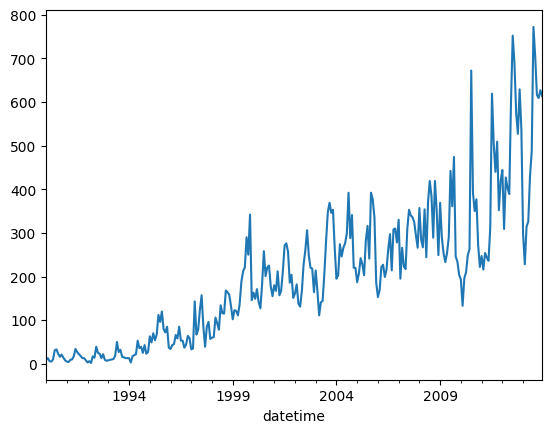

In [ ]:
# Plot line chart by monthly sightings
mthly_sightings.plot();

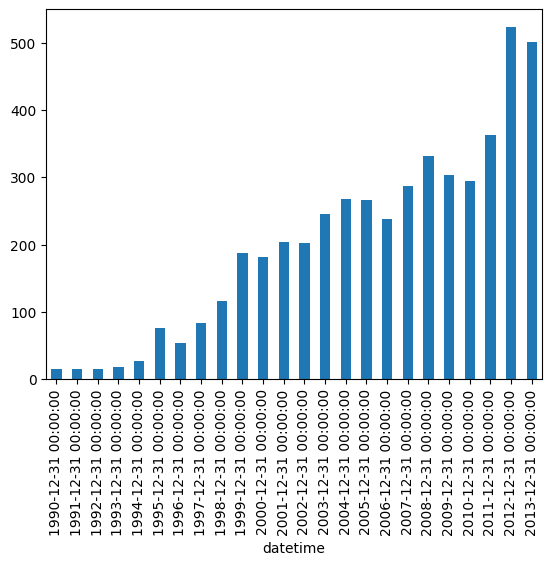

In [21]:
(
    mthly_sightings
    .resample("YE") # group by year (using Dec 31)
    .mean() # aggregate average sightings/year
    .plot.bar() # plot as a bar chart
);

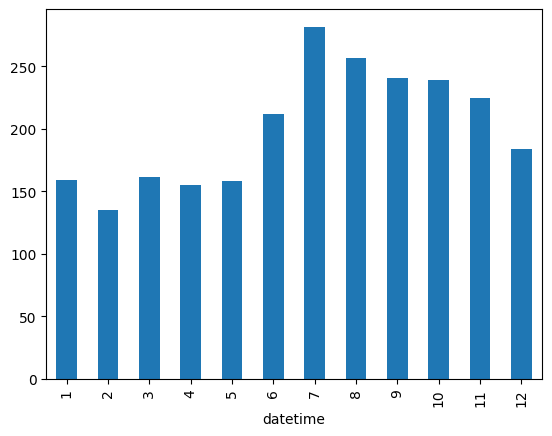

In [22]:
# group by month rather than resample by month
mthly_sightings.groupby(mthly_sightings.index.month).mean().plot.bar();

<font color = 'green'> UFO sightings in the US occurs more frequently in Summer and Autumn months (Jun to Nov) than Winter and Spring (Dec to May). </font>

In [23]:
# Export to .csv
new_df.to_csv('new_df.csv')

## <font color = 'blue'> Forecasting Time Series </font>

In [24]:
# Train test split
train = mthly_sightings["1990-01":"2010-12"].astype(float) # 20 years
test = mthly_sightings["2011-01":"2013-12"].reindex(pd.date_range(start="2011-01-01", end="2013-12-31", freq="ME"),fill_value=0).astype(float) # 2011 to 2014, 5 years

train.head()

datetime
1990-01-31     9.0
1990-02-28    13.0
1990-03-31     6.0
1990-04-30     5.0
1990-05-31    10.0
Freq: ME, Name: sightings, dtype: float64

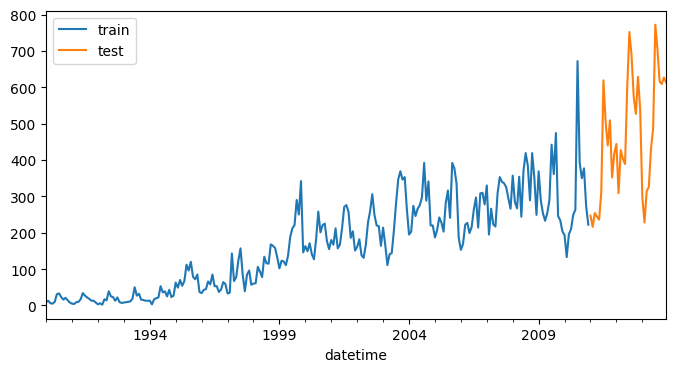

In [25]:
# Plotting the train and test sets
fig, ax = plt.subplots(figsize=(8, 4))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
ax.legend()

plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [27]:
# Running adfuller test

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
# .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())
# .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

adf_test(train)

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.765999
p-value                   0.828906
# lags used              13.000000
# observations          238.000000
critical value (1%)      -3.458128
critical value (5%)      -2.873762
critical value (10%)     -2.573283
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


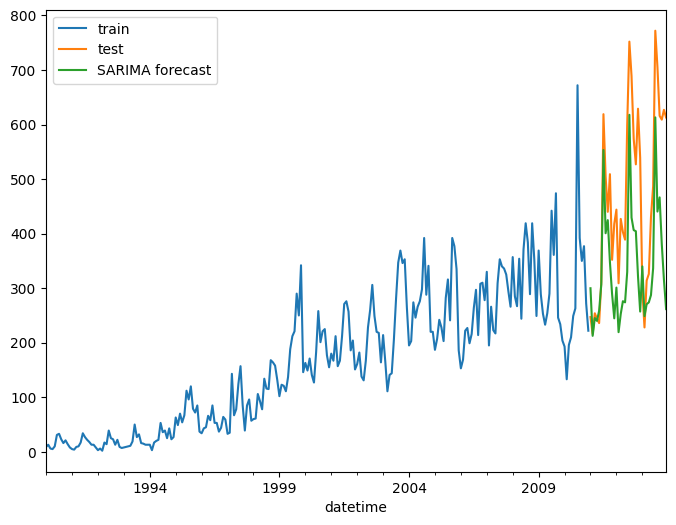

In [28]:
# Plotting Sarima Model
seasonal_model = SARIMAX(train, order=(3, 0, 1), seasonal_order=(3, 2, 1, 12), freq="ME").fit()
y_pred_seasonal = seasonal_model.predict(start="2011-01-01", end="2013-12-31")

fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred_seasonal.plot(ax=ax, label="SARIMA forecast")
ax.legend()

plt.show()

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [30]:
# RMSE check
print("SARIMA RMSE:", np.sqrt(mean_squared_error(test, y_pred_seasonal)))

SARIMA RMSE: 165.19591824248442


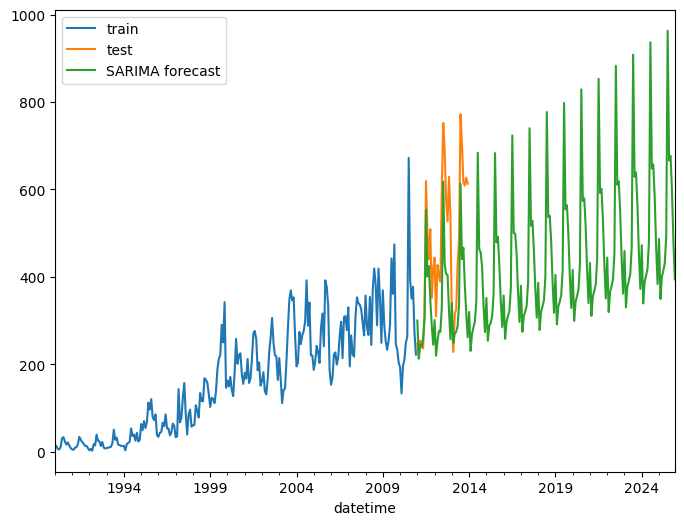

In [31]:
# SARIMA prediction till 2025
seasonal_model = SARIMAX(train, order=(3, 0, 1), seasonal_order=(3, 2, 1, 12), freq="ME").fit()
y_pred_seasonal = seasonal_model.predict(start="2011-01-01", end="2025-12-31")

fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred_seasonal.plot(ax=ax, label="SARIMA forecast")
ax.legend()

plt.show()

## <font color = 'blue'> RAG Setup (copied to .py file for streamlit run) </font>

In [ ]:
import streamlit as st
import pandas as pd
from openai import OpenAI
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from io import StringIO
import matplotlib.pyplot as plt

# Page Header setup
st.set_page_config(
    page_title="UFO Sightings Database Enquiry",
    page_icon="🛸",
    layout="wide"  # Changed to wide layout for better side-by-side charts
)

# Initialize OpenAI client
if 'client' not in st.session_state:
    st.session_state.client = None

# Sidebar for settings
with st.sidebar:
    st.subheader("Settings")
    api_key = st.text_input("OpenAI API Key", type="password")
    if api_key:
        st.session_state.client = OpenAI(api_key=api_key)
        st.success("✓ API key set")
    else:
        st.warning("Please enter API key to continue")

# Data loading 
@st.cache_data
def load_full_dataset():
    try:
        from pathlib import Path
        # Get the current script's directory
        script_dir = Path(__file__).parent
        # Construct the full file path
        csv_path = script_dir / 'new_df.csv'
        df = pd.read_csv(csv_path)
        
        # Fill blanks with unknowns
        df.fillna("Unknown", inplace=True)
        
        # Convert date to datetime
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month_name()
        
        # Create enhanced search text
        df["search_text"] = df.apply(lambda row: 
            f"Date: {row.get('date', 'Unknown')} | "
            f"State: {row.get('state', 'Unknown')} | "
            f"Shape: {row.get('shape', 'Unknown')} | "
            f"Duration: {row.get('duration', 'Unknown')} | "
            f"Comments: {row.get('comments', 'No comments')}", axis=1)
            
        return df
    except Exception as e:
        st.error(f"Data loading error: {str(e)}")
        return None

df = load_full_dataset()

# Custom styling for charts
def apply_chart_style(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()

# Function to display dataset statistics
def show_dataset_statistics(df):
    st.subheader("📊 UFO Sightings Statistics Overview")
    
    if df is None:
        st.warning("No data available to display statistics")
        return
    
    # Basic statistics
    st.markdown("### 📈 Basic Statistics")
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Total Sightings", len(df))
    with col2:
        if 'date' in df.columns:
            st.metric("Date Range", f"{df['date'].min().year} to {df['date'].max().year}")
    with col3:
        if 'state' in df.columns:
            st.metric("Most Sightings State", df['state'].mode()[0] if len(df) > 0 else "N/A")
    
    # First row of charts (side by side)
    st.markdown("---")
    col1, col2 = st.columns(2)
    
    with col1:
        # Top states chart
        st.markdown("### 🗺️ Sightings by State")
        if 'state' in df.columns:
            state_counts = df['state'].value_counts().head(10)
            fig, ax = plt.subplots(figsize=(10, 6))
            state_counts.plot(kind='bar', ax=ax, color='#1f77b4')
            apply_chart_style(ax, 'Top 10 States with Most Sightings', 'State', 'Number of Sightings')
            st.pyplot(fig)
    
    with col2:
        # Sightings over time
        st.markdown("### 📅 Sightings Over Time")
        if 'year' in df.columns:
            yearly_counts = df['year'].value_counts().sort_index()
            fig, ax = plt.subplots(figsize=(10, 6))
            yearly_counts.plot(ax=ax, marker='o', linestyle='-', color='#2ca02c')
            apply_chart_style(ax, 'UFO Sightings by Year', 'Year', 'Number of Sightings')
            st.pyplot(fig)
    
    # Second row of charts (side by side)
    st.markdown("---")
    col1, col2 = st.columns(2)
    
    with col1:
        # Monthly distribution
        st.markdown("### 🌙 Monthly Distribution")
        if 'month' in df.columns:
            month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December']
            monthly_counts = df['month'].value_counts().reindex(month_order, fill_value=0)
            fig, ax = plt.subplots(figsize=(10, 6))
            monthly_counts.plot(kind='bar', ax=ax, color='#9467bd')
            apply_chart_style(ax, 'UFO Sightings by Month', 'Month', 'Number of Sightings')
            st.pyplot(fig)
    
    with col2:
        # UFO shapes statistics
        st.markdown("### 🔮 Common UFO Shapes")
        if 'shape' in df.columns:
            shape_counts = df['shape'].value_counts().head(10)
            fig, ax = plt.subplots(figsize=(10, 6))
            shape_counts.plot(kind='barh', ax=ax, color='#ff7f0e')
            apply_chart_style(ax, 'Top 10 Reported UFO Shapes', 'Number of Sightings', 'Shape')
            st.pyplot(fig)

# Dataset analysis function
def analyze_full_dataset(question, df):
    if not st.session_state.client:
        return "API client not initialized", None
    
    # Prepare the dataset for analysis
    full_context = f"COMPLETE UFO SIGHTINGS DATASET SUMMARY:\n"
    full_context += f"Total sightings: {len(df)}\n"
    
    # Add key statistics
    if 'date' in df.columns:
        full_context += f"Date range: {df['date'].min()} to {df['date'].max()}\n"
    if 'state' in df.columns:
        top_locations = df['state'].value_counts().head(5).to_dict()
        full_context += f"Top States: {', '.join(top_locations.keys())}\n"
    if 'shape' in df.columns:
        top_shapes = df['shape'].value_counts().head(5).to_dict()
        full_context += f"Top shapes: {', '.join(top_shapes.keys())}\n"
    
    # Sample some representative entries
    sample_size = min(10, len(df))
    sample = df.sample(sample_size)
    full_context += f"\nSAMPLE SIGHTINGS ({sample_size} of {len(df)}):\n"
    for idx, row in sample.iterrows():
        full_context += f"\n- {row['search_text']}\n"
    
    # Generate comprehensive answer
    try:
        response = st.session_state.client.chat.completions.create(
            model="gpt-4-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You are a senior UFO data analyst. Provide comprehensive answers "
                    "based on the full dataset. Identify patterns, trends, and notable findings."
                },
                {
                    "role": "user",
                    "content": f"QUESTION: {question}\n\n"
                    f"DATASET OVERVIEW:\n{full_context}\n\n"
                    "ANALYSIS INSTRUCTIONS:\n"
                    "1. Consider ALL sightings in your analysis\n"
                    "2. Identify statistical patterns where possible\n"
                    "3. Note data limitations or biases\n"
                    "4. Provide specific examples when relevant\n"
                    "5. Include quantitative insights if available\n\n"
                    "COMPREHENSIVE ANSWER:"
                }
            ],
            temperature=0.1,  # Lower temp for more factual responses
            max_tokens=500
        )
        
        # Most relevant individual sightings
        if len(df) > 0:
            vectorizer = TfidfVectorizer(stop_words='english')
            tfidf = vectorizer.fit_transform(df["search_text"])
            question_vec = vectorizer.transform([question])
            df['similarity'] = cosine_similarity(question_vec, tfidf).flatten()
            top_sightings = df.sort_values('similarity', ascending=False).head(5)
        else:
            top_sightings = pd.DataFrame()
            
        return response.choices[0].message.content, top_sightings
    except Exception as e:
        return f"Error generating answer: {str(e)}", None

# Main interface
st.title("🛸 UFO Sightings Database Enquiry")
st.write("Get comprehensive answers based on 1990 to 2013 UFO Sightings in US")

question = st.text_area(
    "Ask your question:", 
    placeholder="e.g. Which US State has the most UFO Sightings?",
    height=100
)

if st.button("Analyze Dataset") and question:
    if not st.session_state.client:
        st.warning("Please enter your OpenAI API key")
    elif df is None:
        st.error("Data not loaded properly")
    else:
        with st.spinner("Analyzing dataset..."):
            # Get analysis of full dataset
            answer, top_sightings = analyze_full_dataset(question, df)
            
            # Display results
            st.subheader("Comprehensive Analysis")
            st.markdown(answer)
            
            if top_sightings is not None and not top_sightings.empty:
                st.subheader("Related Individual Sightings")
                st.dataframe(
                    top_sightings.drop(columns=['search_text', 'similarity'], errors='ignore'),
                    hide_index=True,
                    use_container_width=True
                )

st.markdown("---")  # Add a separator

# Show statistics
if df is not None:
    show_dataset_statistics(df)

# Add data export option
if df is not None:
    st.sidebar.markdown("---")
    st.sidebar.download_button(
        label="Download Dataset",
        data=df.to_csv(index=False).encode('utf-8'),
        file_name="ufo_sightings.csv",
        mime="text/csv"
    )